<h3>Linear Regression Assignment</h3>
<h4>SCT 211-0007/2017</h4>
<h4>CHEPKIRUI SHARON TONUI</h4>

In [126]:
#Import required classes and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [127]:
#Reading the data from an Excel file
df = pd.read_csv("squareroots.csv")
df.head()

,Number,Root
0,0,0.000000
1,1,1.000000
2,2,1.414214
3,3,1.732051
4,4,2.000000


In [128]:
df.shape

(1001, 2)

In [129]:
x=df["Number"].values.reshape((-1,1)) #The independent variable
x

array([[   0],
       [   1],
       [   2],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [130]:
y=df["Root"].values # The dependant variable
y

array([ 0.        ,  1.        ,  1.41421356, ..., 31.591138  ,
       31.60696126, 31.6227766 ])

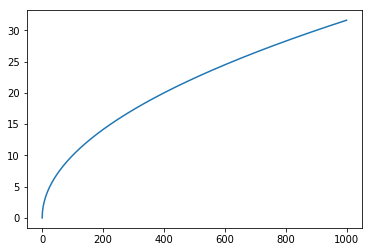

In [131]:
plt.plot(x,y)

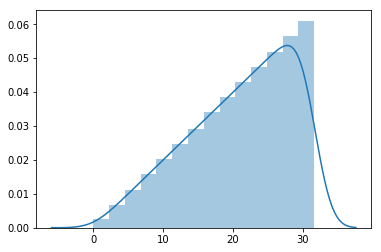

In [132]:
sns.distplot(y)

In [133]:
#Creating the model and fitting it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
model = LinearRegression().fit(x_train,y_train)
model.coef_

array([0.02515039])

<H4> Need for Testing data</H4>
 <h5>Training vs testing data</h5>
Function <b>train_test_split()</b> randomly divides the original data into two sets; training data and testing data. Parameter test_size specifies the percentage of the original dataset allocated to the test split.


In [156]:
 model.intercept_

8.50771346321417

<h5>Scoring is also called prediction, and is the process of generating values based on a trained machine learning model, given some new input data.</h5>

In [135]:
r_sq= model.score(x_train,y_train)
r_sq

0.9606078669596965

<h4>Compare test data and predicted data</h4>

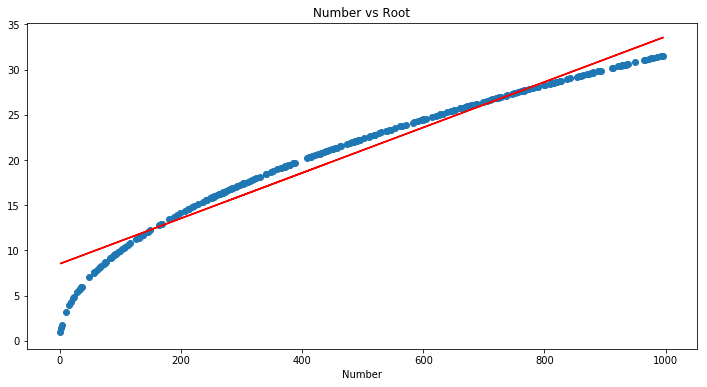

In [157]:
ypred = model.predict(x_test)
plt.figure(figsize=(12,6))
plt.plot(x_test,ypred.reshape((-1,1)),'r')
plt.scatter(x_test,y_test)
plt.xlabel("Number")
plt.ylabel=("Roots")
plt.title("Number vs Root")
plt.show()

(0, 40)

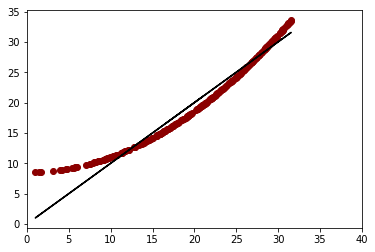

In [158]:
#Best fit comparison
plt.scatter(y_test,ypred,color="darkred")
plt.plot(y_test,y_test,color="black")
plt.xlim(0,40)

In [159]:
#Predict square roots of numbers between 2000 and 2050
quest_array=np.arange(2000,2051,dtype=np.int).reshape((-1,1))
quest_array_pred= model.predict(quest_array)
quest_array_pred

array([58.8085004 , 58.83365079, 58.85880119, 58.88395158, 58.90910197,
       58.93425237, 58.95940276, 58.98455315, 59.00970355, 59.03485394,
       59.06000433, 59.08515473, 59.11030512, 59.13545551, 59.16060591,
       59.1857563 , 59.21090669, 59.23605709, 59.26120748, 59.28635787,
       59.31150827, 59.33665866, 59.36180906, 59.38695945, 59.41210984,
       59.43726024, 59.46241063, 59.48756102, 59.51271142, 59.53786181,
       59.5630122 , 59.5881626 , 59.61331299, 59.63846338, 59.66361378,
       59.68876417, 59.71391456, 59.73906496, 59.76421535, 59.78936574,
       59.81451614, 59.83966653, 59.86481692, 59.88996732, 59.91511771,
       59.9402681 , 59.9654185 , 59.99056889, 60.01571929, 60.04086968,
       60.06602007])

In [160]:
quest_pred_table=pd.DataFrame(quest_array,quest_array_pred,columns={"Number"})
#table_data.columns=["Number","Root"]
table_data.head()

,Number
59.079156,2000
59.104489,2001
59.129822,2002
59.155156,2003
59.180489,2004


<H3>Finding the coefficient of determination</H3>
The <b>coefficient of determination (R)<sup>2</sup></b> is the amount of variations on y that can be explained by x: ie how good of a fit our best fit is.It is calculated by:
\begin{equation*}
R^2 = 1- \frac{SE y (line)} {SE y (total variation)} 
\end{equation*}

In [161]:
#Actual values of y for the predicted data
new_roots = pd.read_csv("newdataroots.csv")
new_roots.head()

,Number,Root
0,2000,44.721360
1,2001,44.732538
2,2002,44.743715
3,2003,44.754888
4,2004,44.766059


In [162]:
y_actual=new_roots["Root"].values


In [163]:
def squared_error(y_actual,quest_array_pred):
    return sum(quest_array_pred-y_actual)**2


In [164]:
def squared_error(y,ypred):
    return sum(ypred-y)**2
def coefficient_of_determination(y,ypred):
    ymean_line = y.mean()
    squared_error_regr = float(squared_error(y,ypred))
    squared_error_ymean = float(squared_error(y,ymean_line))
    return 1-(squared_error_regr/squared_error_ymean)
r_sqr= float(coefficient_of_determination(y_actual,quest_array_pred))
r_sqr

-2.6846483308337183e+33